# Probability distributions

To use this tutorial, read the commands and execute the code in each cell.

The learning objectives are to gain insights into:

1) how to pseudo-randomly sample from probability distributions in Python (typically *rnd commands; e.g., normrnd for a normal distribution)

2) how to generate theoretical distributions in Python (typically *pdf commands; e.g., normpdf for a normal distribution)

3) characteristics of several specific distribuions, including Bernoulli, binomial, Poisson, exponential, and normal (Gaussian)

4) comparing probability distribution functions (pdfs) and cumulative distribution functions (cdfs)

Copyright 2021 by Joshua I. Gold, University of Pennsylvania

In [184]:
import platform

# Output on system used for development/testing:
# 3.9.2
print(platform.python_version())

# Uncomment and run to clear workspace
# %reset

3.9.2


## Bernoulli distribution

Canvas Discussion: https://canvas.upenn.edu/courses/1358934/discussion_topics/5121835

Wikipedia: https://en.wikipedia.org/wiki/Bernoulli_distribution

Mathworld: http://mathworld.wolfram.com/BernoulliDistribution.html

A single Bernoulli trial consists of either: 1) outcome = 1 with probabilty p, or 2) outcome = 0 with probabilty 1-p. This is a DISCRETE distribution because by definition it only takes on specific, discrete values (in this case either 0 or 1)

In [179]:
from scipy.stats import bernoulli
import numpy as np
import random as rnd

# In Python we can use random, which produces a random variable on the interval [0,1), which means that all values are greater than or equal to 0 and less than 1. This function is park of the "random" package imported above as "rnd".
p = 0.7 # choose value for p
single_outcome_method_1 = rnd.random() < p # create logical variable from single pick
print(f"outcome using rand = {single_outcome_method_1}") # print the result

# Or, equivalently, use bernoulli, which is a function in scipy.stats that generates a random pick from a Bernoulli distribution.
p = 0.7  # choose value for p
single_outcome_method_2 = bernoulli.rvs(p, size=1) # generate a single sample using the rvs ("random variates") method. To generate >1 sample, use the size argument
print(f'outcome using binornd = {bool(single_outcome_method_2)}')

# Now generate lots of Bernoulli trials to check if it is converging on the appropriate probability
p = 0.7  # choose value for p
N = 10000; # Number of Bernoulli trials to simulate
outcomes = bernoulli.rvs(p, size=N) # Use the size argument to generate outcomes (an ndarray) from lot of trials
type(outcomes)
print(f'{(outcomes == False).sum()} zeros, {(outcomes == True).sum()} ones, simulated p = {(outcomes == True).sum()/outcomes.size}, empirical p = {p}')

#fprintf('%d zeros, %d ones, simulated p = %.2f, empirical p = %.2f\n', ...
#   sum(outcomes==0), sum(outcomes==1), p, sum(outcomes==1)/N)

outcome using rand = False
outcome using binornd = True
3021 zeros, 6979 ones, simulated p = 0.6979, empirical p = 0.7


## Binomial distribution

Canvas Discussion: https://canvas.upenn.edu/courses/1358934/discussion_topics/5002068

Wikipedia: https://en.wikipedia.org/wiki/Binomial_distribution

Mathworld: http://mathworld.wolfram.com/BinomialDistribution.html

Distribution of the number of successful outcomes for a given number of Bernoulli trials defined by two parameters: 1) p = probability of success on each trial (constant across trials); 2) n = number of trials

This is also a DISCRETE distribution because by definition it only takes on specific, discrete values (in this case non-negative integers corresponding to the number of successes in n tries; thus, values 0:n).


In [1]:
from scipy.stats import binom

# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')


695 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.6950


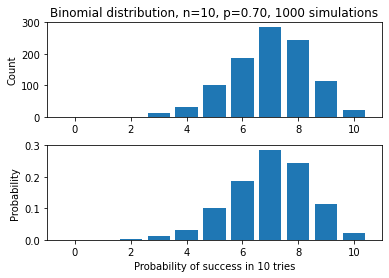

In [2]:
from scipy.stats import binom
import numpy as np
import collections
import matplotlib.pyplot as plt

# The full probability distribution describes the probabilty of obtaining each possible number of successes (k), given n and p. If we set n=10, the the possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram) is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

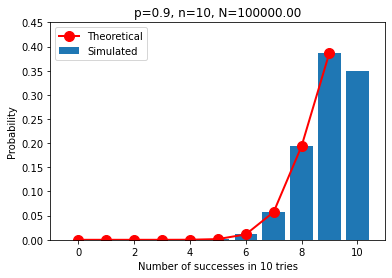

In [3]:
from scipy.stats import binom
import numpy as np
import collections
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# Now let's make a fun animation showing different values of p and N. Note that, of course, the more picks you make of the random variable (hihger N), the more closely the outcomes (the "samples") match the true distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)
        
        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)



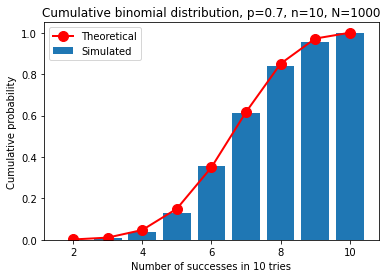

In [5]:
import numpy as np
from scipy.stats import binom
from operator import itemgetter
import collections

# The cumulative distribution function is just the proability of obtaining an outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so it is a probability function and not just a histogram -- note that the final value in the cdf should equal 1 because every value should be equal to or less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

## Poisson distribution

Canvas Discussion: https://canvas.upenn.edu/courses/1358934/discussion_topics/5130868

Wikipedia: https://en.wikipedia.org/wiki/Poisson_distribution

Mathworld: http://mathworld.wolfram.com/PoissonDistribution.html

The Poisson distribution is closely related to the binomial distribution. In both cases, they measure the number of "successes" (or binary events) within a given interval. For the binomial distribution, these events occur within discrete "attempts" (that is, within individaul Bernoulli trials) that we assume occur at regularly spaced times throughout the full interval. For the Poisson distribution, these events can occur at any time in the interval. Thus, the Poisson distribution describes the case in which the time between Bernoulli "attempts" or trials -> zero (the "->" reads as "approaches"). This is equivalent to saying that the number of attempts approaces infinity. 

This is a CONTINUOUS distribution because it describes the probability of any possible time of an event occurring within the given interval.

Let's examine the relationship between the Poisson pdf and binomial pdf by introducing the concept of a Poisson point process (PPP). A PPP is a process that generates binary events at a constant RATE lambda. The key here is that time is contininuous, so probability cannot be determined with respect to a fixed time but rather a fixed time interval (because any fixed time is infinitesimally small).  Thus, we think of events occuring at some rate (mean number of events per unit time) as opposed to a probability (probability of occurrance of the event at a given time). The number of events that the PPP generates in a given interval is a random variable that is distributed as a Poisson pdf (i.e., a PPP is a way of generating a Poisson PDF).

See: https://en.wikipedia.org/wiki/Poisson_point_process

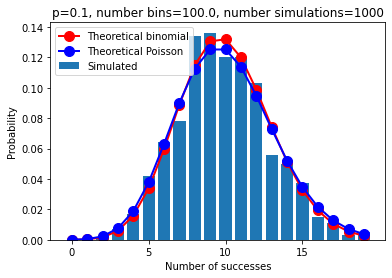

In [1]:
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# The Poisson process is defined by a rate, lambda, of events/sec (call it plambda to avoid Python lambda)
plambda = 1

# We will consider events generated in a given fixed interval, in seconds.
delta_t = 10

# Define an axis for computing and plotting a histogram of counts
max_successes = 20
bins = np.arange(-0.5, max_successes+0.5, 1)
xaxis = (bins[1:] + bins[:-1])/2

# Number of simulations
num_simulations = 1000

# Loop through different numbers of time bins used to divide up the given interval. Remember this is how we will show the transition from a binomial to a Poisson pdf describing the number of events in the interval: as the number of bins gets larger, the simulation gets closer to considering events occurring at any time and thus the distribution gets closer to Poisson
f = plt.figure()
for n in np.round(np.linspace(1, 100, max_successes)):
   
   # Check for events in each bin    
   #    Scale p so that it is probability of events/bin, not events/sec -- which can be at most =1.
   p = np.minimum(plambda * delta_t/n, 1)

   # Simulate outcomes as the number of events that occurred in the n bins ("tries"), given p and done N times.
   outcomes = binom.rvs(int(n), p, size=num_simulations)

   # Make a histogram of the outcomes, using the array of counts ("xaxis") we defined above.
   counts, edges = np.histogram(outcomes, bins)

   # Show a normalized version that is a pdf. Here counts (the x-axis of the histogram) is a DISCRETE variable, so we just have to add up the values
   plt.bar(xaxis, counts/counts.sum())

   # Plot the theoretical binomial pdf, for the values in xaxis and given n and p.
   binoY = binom.pmf(xaxis, n, p)

   # Show in RED
   plt.plot(xaxis, binoY, 'ro-', linewidth=2, markersize=10)

   # Get the equivalent Poisson pdf using the rate computed for the full interval: lambda * deltaT
   poissY = poisson.pmf(xaxis, plambda*delta_t)

   # Show in BLUE
   plt.plot(xaxis, poissY, 'bo-', linewidth=2, markersize=10)

   # Labels, etc
   # plt.axis([xaxis([0]), xaxis([-1]), 0, np.maximum(poissY)+0.1])
   plt.title(f'p={p:.1f}, number bins={n}, number simulations={num_simulations}')
   plt.xlabel('Number of successes')
   plt.xticks(np.arange(0, max_successes, 5))
   plt.ylabel('Probability')
   plt.legend(['Theoretical binomial', 'Theoretical Poisson', 'Simulated'], loc='upper left')
   plt.show()

   # Wait
   time.sleep(0.5)

   # Clear for next plot
   clear_output(wait=True)

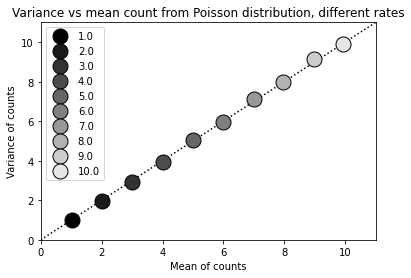

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# An interesting property of a Poisson distributon is that var = mean. Let's try it using simulations!

# Set up simulations using various values of lambda
num_lambdas = 10
lambdas = np.linspace(1,10,num_lambdas)
N = 10000 # number of simulations per condition

# Set up plot
f = plt.figure()
plt.axis([0, np.amax(lambdas)+1, 0, np.amax(lambdas)+1])
plt.plot([0, np.amax(lambdas)+1], [0, np.amax(lambdas)+1], 'k:')

# Show labels
plt.xlabel('Mean of counts')
plt.ylabel('Variance of counts')
plt.title('Variance vs mean count from Poisson distribution, different rates')

# Save plot objects to make legend

# cycle through different values of lambda
for idx, val in enumerate(lambdas):
   
   # Get the counts
   counts = poisson.rvs(val, size=N)
   
   # Plot var vs mean, with grayscale to indicate lambda
   plt.plot(np.mean(counts), np.var(counts), 'ko', markersize=15, markerfacecolor=str(idx/num_lambdas), label=str(val))

# Show legend for grayscale values = different rates (lambdas)
# strs = cellstr(num2str(lambdas'));
plt.legend()

number of events expected=1000, actual=1004


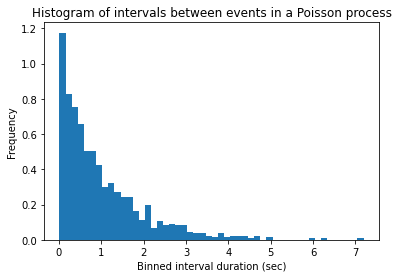

In [291]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import expon

# Let's go back to simulating a Poisson process as the limit of a sequence of Bernoulli trials as the interval size->0. 
delta_t = 1000          # Assume the whole process takes this long
plambda = 1             # Rate (events per sec)
num_bins_per_second = 100    # Number of bins in which to check for events
total_bins = round(num_bins_per_second*delta_t)

# First convert lambda (overall rate) to probability/bin, using deltaT events/time divided by bins/time = events/bin
p = plambda * delta_t / total_bins

# Now simulate checking one "outcome" per bin, using the given probability/bin
outcomes = binom.rvs(1, p, size=total_bins)

# Check that the nubmer of events is what we expect
print(f'number of events expected={plambda*delta_t}, actual={np.sum(outcomes==1)}')

# Now for the next part -- instead of looking at the counts per interval, which is what the Poisson distribution described, we are now going to look at the same data but are considering the intervals between events. As you will see below, these intervals are distributed as an exponential.
# First look at the histogram of intervals between events
# Get intervals
intervals_between_events = np.diff(np.where(outcomes==1))

# Convert to seconds
intervals_between_events_sec = intervals_between_events/num_bins_per_second

# Make and show the normalized histogram. Here the interval is a continuous variable (the x-axis is binned in the histogram to visualize it, but the actual values can take on any continuous value because they represent the amount of time since the previous event), so to normalize the histogram to make a pdf we can't just sum the values -- we have to sum the values multiplied by the bin width (i.e., take the integral). We use numpy's "trapz" which treats each bin as a trapezoid (because the heights before and after can be slightly different) to compute the integral:
counts, edges = np.histogram(intervals_between_events_sec, bins=50)
plt.bar(edges[:-1], np.divide(counts, np.trapz(counts, edges[:-1])), width=0.15, align='edge')
plt.title('Histogram of intervals between events in a Poisson process')
plt.xlabel('Binned interval duration (sec)')
plt.ylabel('Frequency')

# Compare to an exponential distribution (see below), in red, with the rate parameter lambda equal to 1/lambda
# plt.plot(edges[:-1], expon.pdf(edges[:-1], scale=1/plambda), 'r-', linewidth=2)
plt.show()

## Exponential distribution

Canvas: https://canvas.upenn.edu/courses/1358934/discussion_topics/5130869

Wikipedia: https://en.wikipedia.org/wiki/Exponential_distribution

Mathworks: http://mathworld.wolfram.com/ExponentialDistribution.html

This distribution describes the frequency of occurrence of CONTINUOUS events that decays exponentially with larger values. 

lambda*deltaT = 4775.06, mean = 4778.40, var = 5003.88


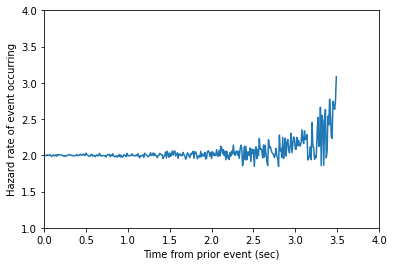

In [281]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Here's a better way to simulate a Poisson process: instead of approximating continuous time with small time bins, directly simulate the (continuous) time between events as an exponential
plambda = 2                     # events/sec
events_per_simulation = 5000    # events/simulation
num_simulations = 1000          # number of simulations

# The mean of the (exponential) distribution of intervals between events generated by a Poisson process is equal to the inverse of the rate at which the events are generated (because time/event is the inverse of events/time)
mu = 1/plambda

# Simulate a bunch of intervals picked from an exponential distribution (using numpy's version here, which is supposed to be faster than scipy) - rows are events, coluns are simulations
intervals = np.random.exponential(mu, size=(events_per_simulation, num_simulations))

# Sum them per run (columns) so the events correspond to timestamps
times = np.cumsum(intervals, axis=0)

# A bit of a cheat -- find the run with the shortest time, then use that as the interval to test across runs
min_time = min(times[-1])

# Count the times less than the min interval per run
counts = sum(times<=min_time)

# Check mean, var (for a simulated Posson process, the mean and var should be pretty close to each other -- where "pretty close" is going to depend on factors like N and M)
print(f'lambda*deltaT = {plambda*min_time:.2f}, mean = {np.mean(counts):.2f}, var = {np.var(counts):.2f}')

# Now let's consider the "Randomness" of this process in more detail.
#   We say that it has a "flat hazard function": at any given point in time there is an equal probabilty of the event occuring, given that it hasn't occurred yet. We can compute this function from the simulated intervals as the pdf/(1-cdf) [that is, the probability of a given interval, defined as the pdf, divided by 1 - the probablity that the given interval occurred]:

# Compute over this range. See below for an explanation of what the upper range (here scaled by rangeScale) does to the calcluation.
rangeScale = 10
xs = np.arange(0, mu*rangeScale+0.01, 0.01)

# Compute separately per simulation, will store in this matrix
hazards = np.zeros((np.size(xs)-1, num_simulations))

# Loop through the simulations
for ii in range(1, num_simulations):

    # Get the histogram of intervals using bins defined by "xs"
    counts, edges = np.histogram(intervals[intervals[:,ii]<min_time, ii], bins=xs)

    # Convert into a pdf
    i_pdf = np.divide(counts, np.trapz(counts, xs[:-1]))

    # Compute the cdf, again using trapz
    i_cdf = scipy.integrate.cumtrapz(i_pdf, xs[:-1], initial=0)
    i_cdf[i_cdf==1] = np.nan # avoid div by zero

    # Save the hazard
    hazards[:, ii] = np.divide(i_pdf, 1-i_cdf)

# Show the mean hazard across runs. Notice that:
#
# 1. it is roughly constant and equal to 2 --- which is the rate (lambda) that we started with above (and the inverse of the mean of the exponential distribution of intervals that we generated).
#
# 2. The mean is noisy, especially for long intervals (large values along the x-axis) - this is because those intervals don't happen very much (the long tail of the exponential distribution) so even with large N those points are undesampled.
#
# 3. For very large intervals, the results are not just noisy, but biased (the hazard rate starts to sweep upwards on the right of the figure). This is because the true exponential has a tail that goes to infinity, but here we stop it at some finite time. This procedure implies that events that in a real Poisson process (with a real flat hazard) would occur after a very long interval will be counted here as bunching up in the longest bins we check -- so the probability of occurrance in those bins will be slighly higher than expected for a real exponential, making the hazard rate larger, too. You can make this effect more pronounced by choosing a shorter range of xs, above.
plt.plot(xs[:-1], np.mean(hazards,axis=1))
plt.xlabel('Time from prior event (sec)')
plt.ylabel('Hazard rate of event occurring')
plt.axis([0, 4, 1, 4])
plt.show()

## Normal (Gaussian) distribution

Canvas: https://canvas.upenn.edu/courses/1358934/discussion_topics/5121851

Wikipedia: https://en.wikipedia.org/wiki/Normal_distribution

Mathworks: http://mathworld.wolfram.com/GaussianFunction.html

This is another CONTINOUS distribution that describes the relative frequencies of occurrence of continuous values following a bell-shaped curve.


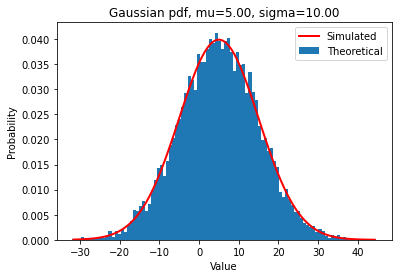

Sample mean = 5.012
Expected value of empirical distribution = 5.013
Expected value of the theoretical distribution = 5.002
Number of different values = 0


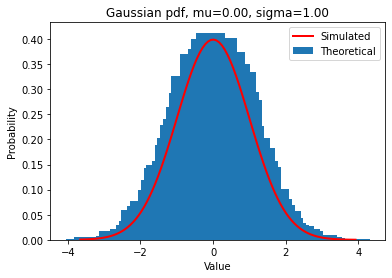

In [311]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Let's compare simulated and theoretical Gaussians
mu = 5
sigma = 10
N = 10000

# Get samples
samples = np.random.normal(mu, sigma, N)

# plot histogram for a given number of bins (using trapz to approximate pdf)
nbins = 100
counts, edges = np.histogram(samples, bins=nbins)
xaxis = (edges[1:] + edges[:-1])/2
n_pdf = np.divide(counts, np.trapz(counts, xaxis))
plt.bar(xaxis, n_pdf)

# Show theoretical pdf in red
plt.plot(xaxis, st.norm.pdf(xaxis, mu, sigma), 'r-', linewidth=2)

# labels, ets
plt.title(f'Gaussian pdf, mu={mu:.2f}, sigma={sigma:.2f}')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend(['Simulated', 'Theoretical'])
plt.show()

# Some summary statistics
# 1. The sample mean
print(f'Sample mean = {np.mean(samples):.3f}')

# 2. The expected value of the empirical distribution: the sum of probability x value per bin. This should be similar to the sample mean, but recognize that we lost some information from the binning (i.e., use more bins and this should get closer to the sample mean)
print(f'Expected value of empirical distribution = {np.sum(np.prod([xaxis, np.diff(edges), n_pdf], axis=0)):.3f}')

# 3. The expected value of the theoretical distribution
print(f'Expected value of the theoretical distribution = {np.sum(np.prod([xaxis, np.diff(edges), st.norm.pdf(xaxis, mu, sigma)], axis=0)):.3f}')

# Now standardize ("z-score") the samples by subtracting the mean and dividing by the STD
# The harder way
zSamples = np.divide(samples-np.mean(samples), np.std(samples))

# The easier way
z2Samples = st.zscore(samples)

# Check that they are the same
print(f'Number of different values = {np.count_nonzero(zSamples-z2Samples)}')

# Show the distribution of z-scored values
counts, edges = np.histogram(z2Samples, bins=nbins)
xaxis = (edges[1:] + edges[:-1])/2
plt.bar(xaxis, np.divide(counts, np.trapz(counts, xaxis)))

# Show theoretical "standard normal" pdf in red
plt.plot(xaxis, st.norm.pdf(xaxis), 'r-', linewidth=2)

# labels, ets
plt.title(f'Gaussian pdf, mu={np.mean(zSamples):.2f}, sigma={np.std(zSamples):.2f}')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend(['Simulated', 'Theoretical'])
plt.show()